In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [8]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [10]:
df=train_data.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
import seaborn as sns

<Axes: >

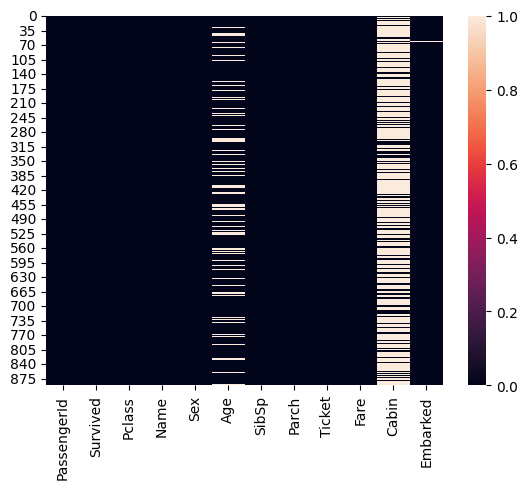

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
df.drop(['Cabin'], axis =1 , inplace = True)

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [17]:
male_avg = int(df[df['Sex']=='male']['Age'].mean())
female_avg = int(df[df['Sex'] == 'female']['Age'].mean())

In [18]:
male_avg

30

In [19]:
def fill_age(row):
    if pd.isna(row['Age']):
        if row['Sex'] == 'male':
            return male_avg
        else:
            return female_avg
    else:
        return row['Age'] 
    
df['Age'] = df.apply(fill_age, axis=1)
df
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [20]:
Embarked_mode = df["Embarked"].mode()[0]
Embarked_mode

'S'

In [21]:
df["Embarked"].fillna(Embarked_mode, inplace = True)

/tmp/ipykernel_36/2510172587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(Embarked_mode, inplace = True)


<Axes: >

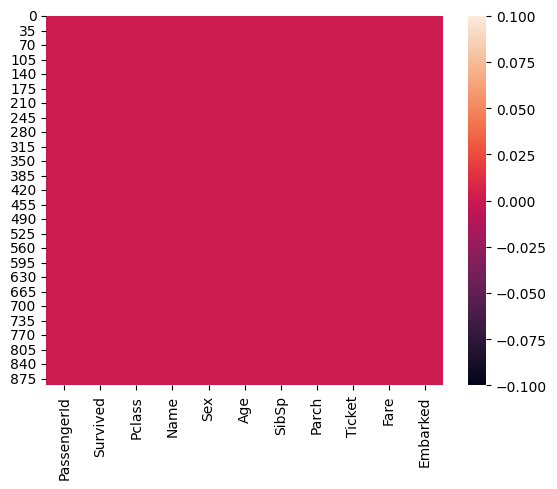

In [22]:
sns.heatmap(df.isnull())

In [23]:
df['Survived'].replace({0: 'Dead', 1: 'Survived'}).value_counts()

Survived
Dead        549
Survived    342
Name: count, dtype: int64

In [25]:
labels = df['Survived'].replace({0: 'Dead', 1: 'Survived'}).value_counts()

<Axes: ylabel='count'>

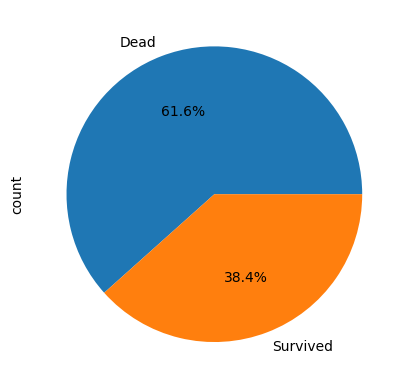

In [26]:
labels.plot(kind='pie', autopct='%1.1f%%')

In [27]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0.5, 1.0, 'Genders on the Titanic')

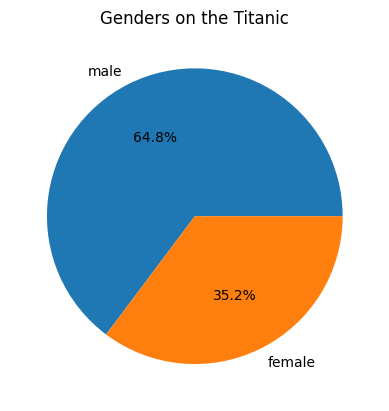

In [28]:
plt.pie(df.Sex.value_counts(), labels = ['male', 'female'], autopct="%1.1f%%")
plt.title("Genders on the Titanic")

In [29]:
df[(df['Sex']=='male') & (df['Survived'] == 1)]["Survived"].sum()

109

In [30]:
df[(df['Sex']=='female') & (df['Survived'] == 1)]["Survived"].sum()

233

In [32]:
gender = ['males', 'females']
survived = [109, 233]

Text(0.5, 1.0, 'Survivors gender')

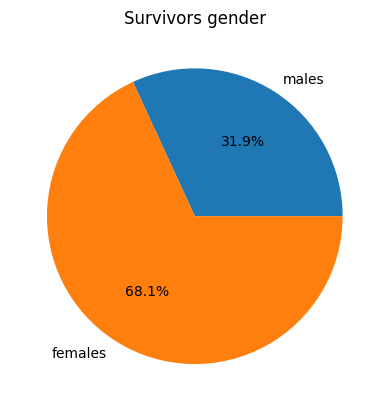

In [35]:
plt.pie(survived, labels = gender, autopct='%1.1f%%')
plt.title('Survivors gender')

In [37]:
s_female = df[(df['Sex'] == 'female') & (df['Survived'] == 1) ]["Survived"].sum()
s_male = df[(df['Sex'] == 'male') & (df['Survived'] == 1) ]["Survived"].sum()
male_rate = (s_male/df[df['Sex'] == 'male'].value_counts().sum())*100
female_rate = (s_female/df[df['Sex'] == 'female'].value_counts().sum())*100
print(f"Survival rates by gender:")
print(f"Male: {male_rate:.1f}%")
print(f"Female: {female_rate:.1f}%")

Survival rates by gender:
Male: 18.9%
Female: 74.2%


In [38]:
df[df['Sex'] == 'female'].value_counts().sum()

314

In [39]:
female_rate = s_female/df[df['Sex']=='female'].value_counts().sum()*100
female_rate

74.20382165605095

In [40]:
df[df["Survived"] == 1]["Age"].mean()
df.Age.mean()

29.580437710437707

In [41]:
survivors = df[df["Survived"] == 1]

Text(0.5, 1.0, 'Histogram of Ages of Survivors')

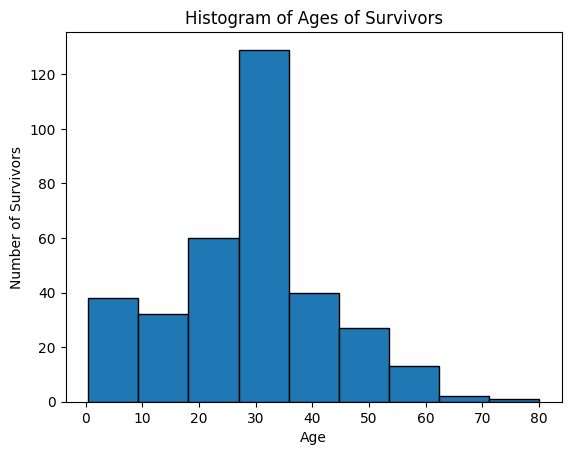

In [42]:
plt.hist(survivors['Age'], bins=9, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.title('Histogram of Ages of Survivors')

In [43]:
survivors.Fare.mean()

48.39540760233918

In [44]:
survivors.Fare.median()

26.0

In [45]:
survivors.Fare.max()

512.3292

In [47]:
survivors.Fare.min()

0.0

In [48]:
df[df.Survived == 0].Fare.max()

263.0

In [49]:
df[df.Survived == 0].Fare.min()

0.0

(array([160.,  73.,  40.,  30.,  11.,  12.,   2.,   0.,   6.,   1.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

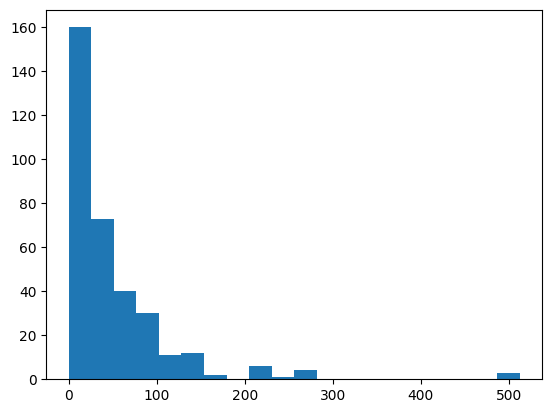

In [50]:
plt.hist(survivors['Fare'], bins=20)

In [51]:
df.Fare.value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [52]:
survivors["Pclass"].value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

Text(0.5, 1.0, 'Survivors classes')

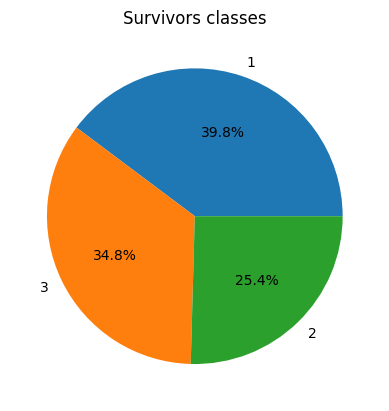

In [53]:
plt.pie(survivors["Pclass"].value_counts() ,labels = survivors["Pclass"].value_counts().index ,autopct = "%1.1f%%")
plt.title("Survivors classes")

In [54]:
class1_sur = df[(df["Pclass"] == 1) & (df["Survived"] == 1)]["Survived"].value_counts().sum()
class1_rate=class1_sur/df[df["Pclass"] == 1].value_counts().sum() *100
class2_sur = df[(df["Pclass"] == 2) & (df["Survived"] == 1)]["Survived"].value_counts().sum()
class2_rate=class2_sur/df[df["Pclass"] == 2].value_counts().sum() *100
class3_sur = df[(df["Pclass"] == 3) & (df["Survived"] == 1)]["Survived"].value_counts().sum()
class3_rate=class3_sur/df[df["Pclass"] == 3].value_counts().sum() *100

print(f"Survival rates by passenger class:")
print(f"Class 1: {class1_rate:.1f}%")
print(f"Class 2: {class2_rate:.1f}%")
print(f"Class 3: {class3_rate:.1f}%")

Survival rates by passenger class:
Class 1: 63.0%
Class 2: 47.3%
Class 3: 24.2%


In [55]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

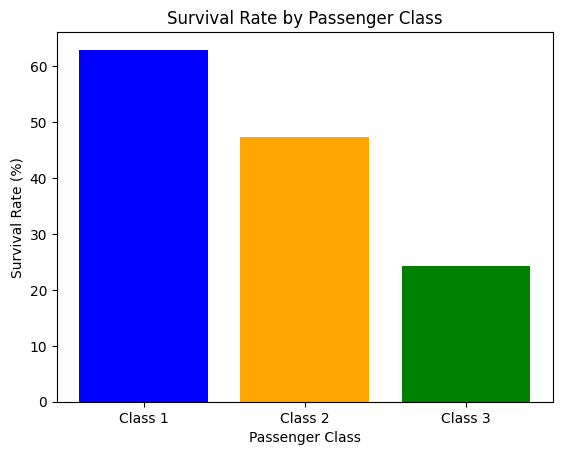

In [56]:
classes = ['Class 1', 'Class 2', 'Class 3']
rates = [class1_rate, class2_rate, class3_rate]

plt.bar(classes, rates, color=['blue', 'orange', 'green'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Passenger Class')

In [57]:
df[df["Pclass"] == 1]["Survived"].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [59]:
surv_withsb = survivors[survivors["SibSp"] > 0].SibSp.value_counts().sum()

In [60]:
percent = surv_withsb / survivors.value_counts().sum() * 100
print(f"{percent:.1f}% of the survivors had siblings or spouses on the Titanic")

38.6% of the survivors had siblings or spouses on the Titanic


In [61]:
surv_withsb_df=survivors[survivors["SibSp"] > 0]
surv_withsb_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S
...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S


Text(0.5, 1.0, 'Number of siblings with the survivors ')

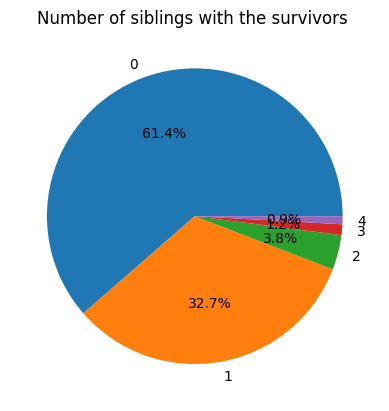

In [62]:
plt.pie(survivors.SibSp.value_counts() ,labels = survivors.SibSp.value_counts().index ,  autopct= "%1.1f%%")
plt.title("Number of siblings with the survivors ")

Text(0.5, 1.0, 'Number of siblings with the not survivors ')

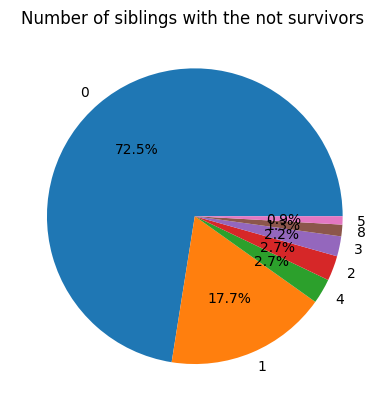

In [63]:
not_survivors = df[df["Survived"] == 0]
plt.pie(not_survivors.SibSp.value_counts() ,labels = not_survivors.SibSp.value_counts().index ,  autopct= "%1.1f%%")
plt.title("Number of siblings with the not survivors ")

In [64]:
surv_withpar = survivors[survivors["Parch"] > 0].SibSp.value_counts().sum()
percent2 = surv_withpar / survivors.value_counts().sum() * 100
print(f"{percent2:.1f}% of the survivors had Parents or childs on the Titanic")

31.9% of the survivors had Parents or childs on the Titanic


Text(0.5, 1.0, 'Number of parents or childs with the survivors ')

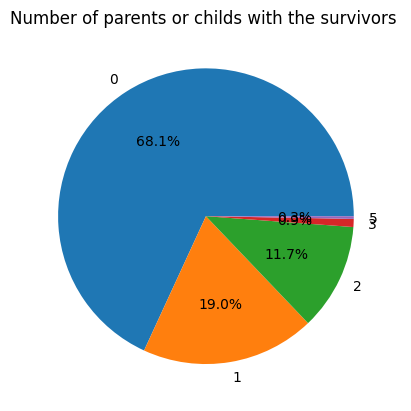

In [65]:
plt.pie(survivors.Parch.value_counts() ,labels = survivors.Parch.value_counts().index ,  autopct= "%1.1f%%")
plt.title("Number of parents or childs with the survivors ")

Text(0.5, 1.0, 'Number of parents or childs with the not survivors ')

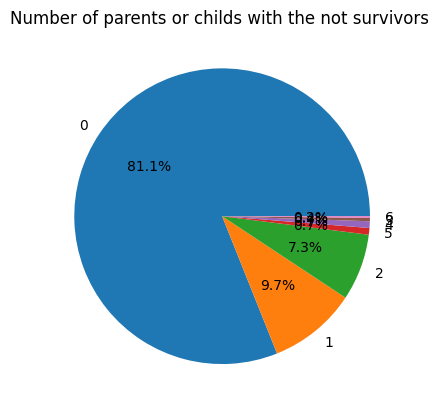

In [66]:
plt.pie(not_survivors.Parch.value_counts() ,labels = not_survivors.Parch.value_counts().index ,  autopct= "%1.1f%%")
plt.title("Number of parents or childs with the not survivors ")

Text(0.5, 1.0, '')

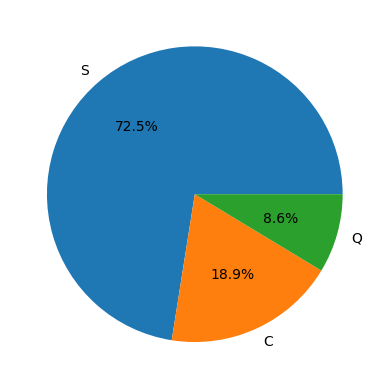

In [67]:
plt.pie(df.Embarked.value_counts() , labels = ["S" , "C" , "Q"] , autopct = "%1.1f%%")
plt.title("")

Text(0.5, 1.0, '')

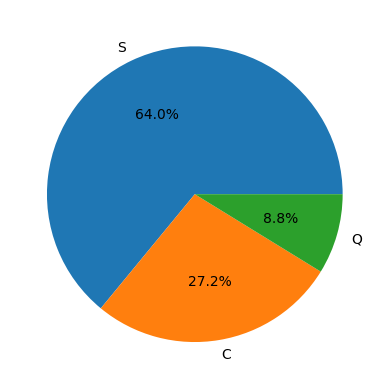

In [68]:
plt.pie(survivors.Embarked.value_counts() , labels = ["S" , "C" , "Q"] , autopct = "%1.1f%%")
plt.title("")